In [3]:
# importing pandas and reading the csv file
import pandas as pd

df = pd.read_csv("C:/Users/ESTHER TIANA/Downloads/customer_signups.csv")
df.head()


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-24,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-24,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-24,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-24,LinkedIn,West,Premium,No,25,Other


In [4]:
# checking for missing values 
df.isnull().sum()

# checking data types
df.dtypes

# checking for duplicate rows
df.duplicated().sum()

# summarizing the stats to spot odd values
df.describe(include='all')

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
count,298,291,266,298,291,270,292,290,288,292
unique,298,291,265,295,7,5,8,3,11,7
top,CUST00299,Mr. Bruce Bridges,lisa11@mailhub.org,not a date,YouTube,North,Premium,No,40,Other
freq,1,1,2,4,58,65,57,156,50,59


In [7]:
# checking for the total number of duplicated rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [23]:
# Checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 1 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       292 non-null    object        
 1   name              284 non-null    object        
 2   email             259 non-null    object        
 3   signup_date       292 non-null    datetime64[ns]
 4   source            283 non-null    object        
 5   region            263 non-null    object        
 6   plan_selected     284 non-null    object        
 7   marketing_opt_in  282 non-null    object        
 8   age               280 non-null    object        
 9   gender            284 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 25.1+ KB


In [9]:
# Checking for missing values clearly 
print(df.isnull().sum())

customer_id          2
name                 9
email               34
signup_date          2
source               9
region              30
plan_selected        8
marketing_opt_in    10
age                 12
gender               8
dtype: int64


In [13]:
# Checking for empty strings or white spaces
print((df == '').sum())

customer_id         0
name                0
email               0
signup_date         0
source              0
region              0
plan_selected       0
marketing_opt_in    0
age                 0
gender              0
dtype: int64


In [16]:
# converting signup_date with "not a date" to NaT
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')
print(df['signup_date'].isnull().sum())

6


In [25]:
# Converting signup_date to datetime and coerce errors
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')

# then dropping rows where the conversion failed (they became NaT)
df = df[df['signup_date'].notna()]


In [26]:
print("Nulls after cleaning signup_date:")
print(df['signup_date'].isna().sum())


Nulls after cleaning signup_date:
0


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 1 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       292 non-null    object        
 1   name              284 non-null    object        
 2   email             259 non-null    object        
 3   signup_date       292 non-null    datetime64[ns]
 4   source            283 non-null    object        
 5   region            263 non-null    object        
 6   plan_selected     284 non-null    object        
 7   marketing_opt_in  282 non-null    object        
 8   age               280 non-null    object        
 9   gender            284 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 25.1+ KB
None


In [30]:
# Converting age to numeric and checking how many invalid ages turned into NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')
print(df['age'].isna().sum())

19


In [31]:
# Checking to see what the dataset looks like now if there more inconsistencies to be dealt with
print(df[df['age'].isna()])

    customer_id             name                    email signup_date  \
21    CUST00021    Suzanne Jones    suzanne21@mailhub.org  2024-01-22   
23    CUST00023        Dawn Cook       dawn23@example.com  2024-01-24   
33    CUST00033       Jodi Curry        jodi33mailhub.org  2024-03-02   
37    CUST00037      Thomas Ruiz   thomas37@inboxmail.net  2024-07-02   
40    CUST00040    Mary Phillips       mary40@mailhub.org  2024-10-02   
53    CUST00053    Rebecca Lopez  rebecca53@inboxmail.net  2024-02-23   
56    CUST00056      Brian Hardy      brian56@mailhub.org  2024-02-26   
76    CUST00076   Dalton Herrera     dalton76@example.com  2024-03-17   
88    CUST00088      Paula Bruce    paula88@inboxmail.net  2024-03-29   
108   CUST00108  Allison Hoffman                      NaN  2024-04-18   
116   CUST00116   Daniel Leonard   daniel16@inboxmail.net  2024-04-26   
126   CUST00126  Ronald Robinson                      NaN  2024-06-05   
129   CUST00129   Ashley Francis     ashley29@examp

In [33]:
# Removing rows with missing or invalid emails
df = df[df['email'].notna()]  # removing NaN
df = df[df['email'].str.contains('@')]  # removing invalid email format

# Doing this to double-check that there are no missing emails
print("Remaining rows after cleaning emails:", len(df))
print(df['email'].isna().sum()) 

Remaining rows after cleaning emails: 257
0


In [34]:
# Fixing and removing rows with invalid or missing age;
# Step 1: Converting age to numeric, force errors to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Step 2: Checking how many ages are still missing after conversion
print("Missing ages after conversion:", df['age'].isna().sum())

# Step 3: Dropping rows where age is missing
df = df[df['age'].notna()]

# Step 4: Removing unrealistic ages (e.g, under 10 or over 100)
df = df[(df['age'] >= 10) & (df['age'] <= 100)]

# Final check to be sure
print("Remaining rows after age cleanup:", len(df))


Missing ages after conversion: 16
Remaining rows after age cleanup: 240


In [35]:
# Fixing and cleaning inconsistences in the gender column
print("Unique gender values (raw):")
print(df['gender'].value_counts(dropna=False))

Unique gender values (raw):
gender
Other         46
FEMALE        43
male          39
Non-Binary    35
Male          35
Female        34
123            4
NaN            4
Name: count, dtype: int64


In [36]:
# Step 1: Converting to lowercase for consistent mapping
df['gender'] = df['gender'].str.lower()

# Step 2: Map known values to standardized forms
gender_map = {
    'male': 'Male',
    'female': 'Female',
    'non-binary': 'Non-Binary',
    'other': 'Other'
}
df['gender'] = df['gender'].map(gender_map)

# Step 3: Remove rows where gender is still NaN (invalid like "123" or originally NaN)
df = df[df['gender'].notna()]

# Confirming if its clean
print("Cleaned gender values:")
print(df['gender'].value_counts(dropna=False))


Cleaned gender values:
gender
Female        77
Male          74
Other         46
Non-Binary    35
Name: count, dtype: int64


In [37]:
# Fixing the region column
print(df['region'].value_counts(dropna=False))

region
North      52
South      47
East       45
West       35
Central    29
NaN        24
Name: count, dtype: int64


In [38]:
# Replacing NaN values with Unknown
df['region'] = df['region'].fillna('Unknown')
print(df['region'].value_counts())

region
North      52
South      47
East       45
West       35
Central    29
Unknown    24
Name: count, dtype: int64


In [39]:
#Fixing the signup_date column
print(df['signup_date'].head())
print(df['signup_date'].dtype)

1   2024-02-01
2   2024-03-01
3   2024-04-01
4   2024-05-01
5   2024-06-01
Name: signup_date, dtype: datetime64[ns]
datetime64[ns]


In [40]:
# Checking how many rows have invalid or missing dates
print("Missing signup dates after conversion:", df['signup_date'].isna().sum())

Missing signup dates after conversion: 0


In [41]:
# Creating a new time-based column
df['signup_month'] = df['signup_date'].dt.month_name()
df['signup_year'] = df['signup_date'].dt.year
df['signup_weekday'] = df['signup_date'].dt.day_name()

#Confirming if its been created
print(df[['signup_date', 'signup_month', 'signup_year', 'signup_weekday']].head())


  signup_date signup_month  signup_year signup_weekday
1  2024-02-01     February         2024       Thursday
2  2024-03-01        March         2024         Friday
3  2024-04-01        April         2024         Monday
4  2024-05-01          May         2024      Wednesday
5  2024-06-01         June         2024       Saturday


In [45]:
# Analyzing monthly signup behaviour
monthly_counts = df['signup_month'].value_counts().sort_values(ascending=False)
print(monthly_counts)

signup_month
January      24
July         24
May          23
September    23
April        22
June         22
August       21
February     21
March        19
October      15
December     10
November      8
Name: count, dtype: int64


In [46]:
# Analyzing weekday signup behaviour
weekday_counts = df['signup_weekday'].value_counts().sort_values(ascending=False)
print(weekday_counts)


signup_weekday
Saturday     39
Sunday       38
Monday       34
Tuesday      33
Friday       32
Thursday     28
Wednesday    28
Name: count, dtype: int64


In [44]:
# Checking the signup trend over time
signup_trend = df['signup_date'].value_counts().sort_index()

# showing just the first 10 days
print(signup_trend.head(10))  

signup_date
2024-01-02    1
2024-01-03    1
2024-01-04    1
2024-01-05    1
2024-01-06    1
2024-01-07    1
2024-01-08    1
2024-01-09    1
2024-01-10    1
2024-01-13    1
Name: count, dtype: int64


In [48]:
# installing seaborn
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.
C:\Users\ESTHER TIANA\AppData\Local\Temp\ipykernel_13120\2532194186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='pastel')


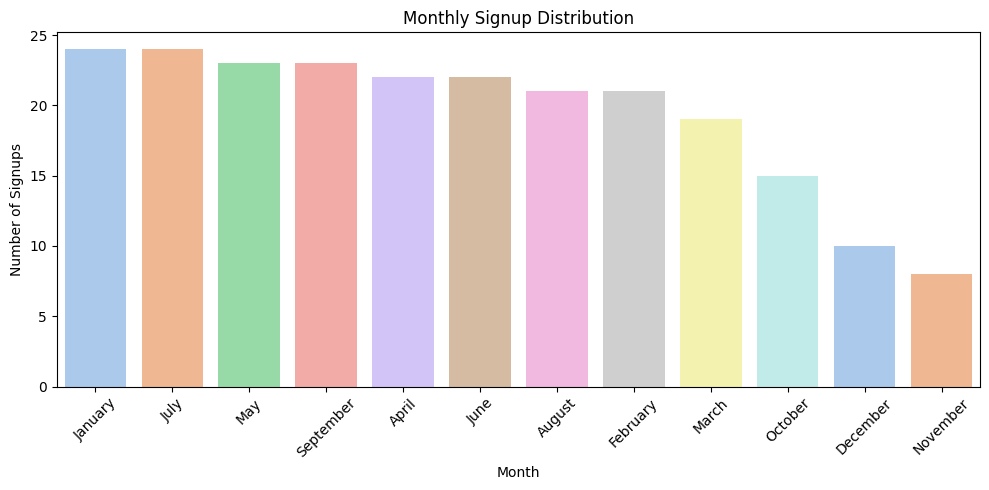

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for Monthly Signups
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='pastel')
plt.title('Monthly Signup Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ESTHER TIANA\AppData\Local\Temp\ipykernel_13120\404195739.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='muted')


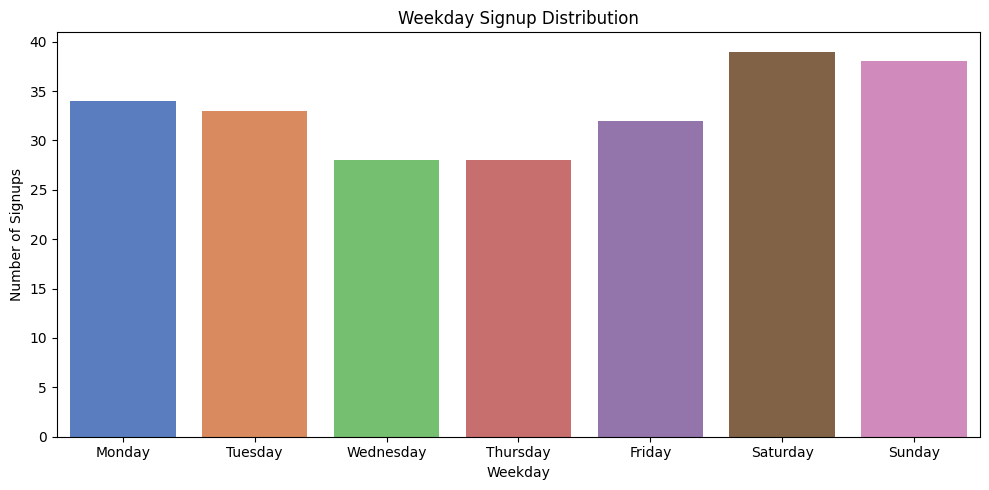

In [50]:
# Bar chart for weekday signups 
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df['signup_weekday'].value_counts().reindex(weekday_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='muted')
plt.title('Weekday Signup Distribution')
plt.xlabel('Weekday')
plt.ylabel('Number of Signups')
plt.tight_layout()
plt.show()

In [51]:
# Analyzing the age group segment
# step 1: define age groups
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

#step 2: Count by age group
age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)


age_group
<18        0
18-25     23
26-35    111
36-45     42
46-60     44
60+       12
Name: count, dtype: int64


C:\Users\ESTHER TIANA\AppData\Local\Temp\ipykernel_13120\2036918558.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')


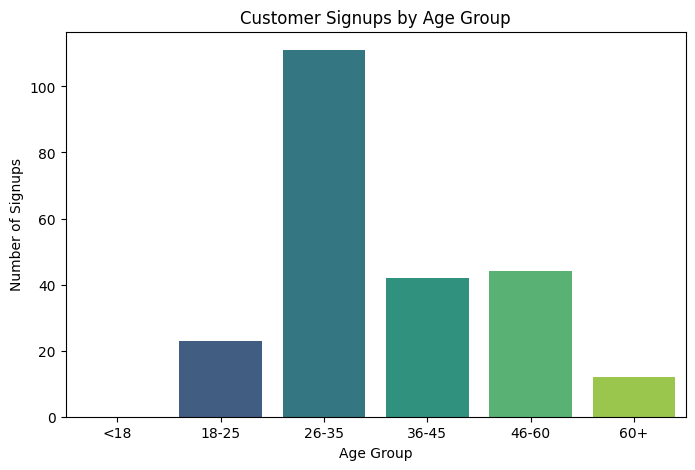

In [52]:
# Bar chart for Age group distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title('Customer Signups by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Signups')
plt.show()

In [58]:
customer_df = pd.read_csv(r"C:\Users\ESTHER TIANA\Downloads\customer_signups.csv")


In [59]:
customer_df.head()


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-24,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-24,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-24,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-24,LinkedIn,West,Premium,No,25,Other


In [61]:
# Cleaning gender column
customer_df['gender'] = customer_df['gender'].str.strip().str.lower()

# Replacing invalid or unexpected gender entries
valid_genders = ['male', 'female', 'non-binary', 'other']
customer_df['gender'] = customer_df['gender'].apply(lambda x: x if x in valid_genders else 'other')


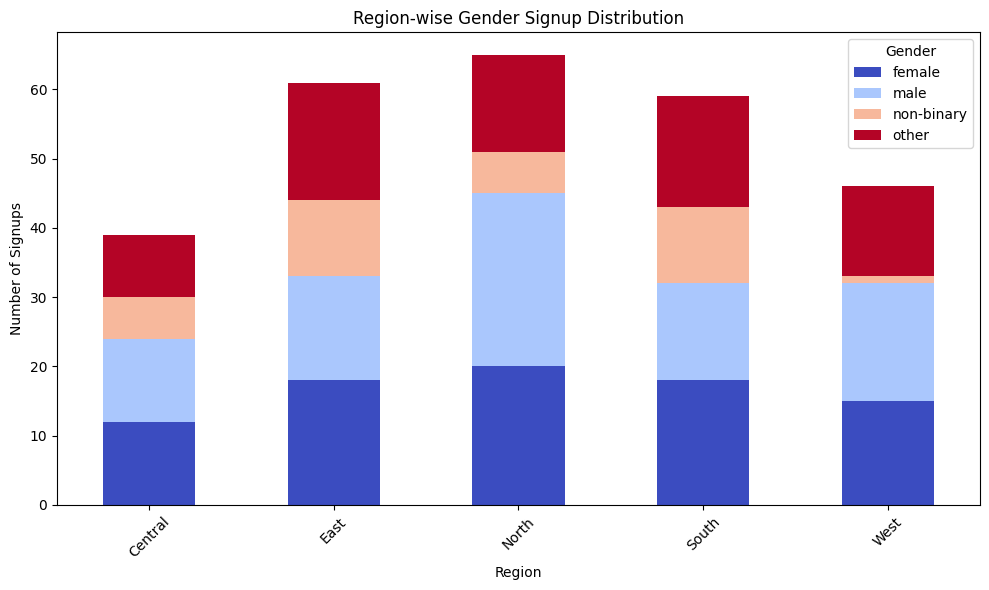

In [62]:
# Re-runing grouping and chart
region_gender = customer_df.groupby(['region', 'gender']).size().unstack().fillna(0)

region_gender.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('Region-wise Gender Signup Distribution')
plt.xlabel('Region')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [65]:
# Converting 'age' to numeric (invalid parsing will become NaN)
customer_df['age'] = pd.to_numeric(customer_df['age'], errors='coerce')

# applying binning
bins = [0, 17, 25, 35, 50, 100]
labels = ['Under 18', '18-25', '26-35', '36-50', '51+']
customer_df['age_group'] = pd.cut(customer_df['age'], bins=bins, labels=labels)


C:\Users\ESTHER TIANA\AppData\Local\Temp\ipykernel_13120\3229557765.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_age = customer_df.groupby(['region', 'age_group']).size().unstack().fillna(0)


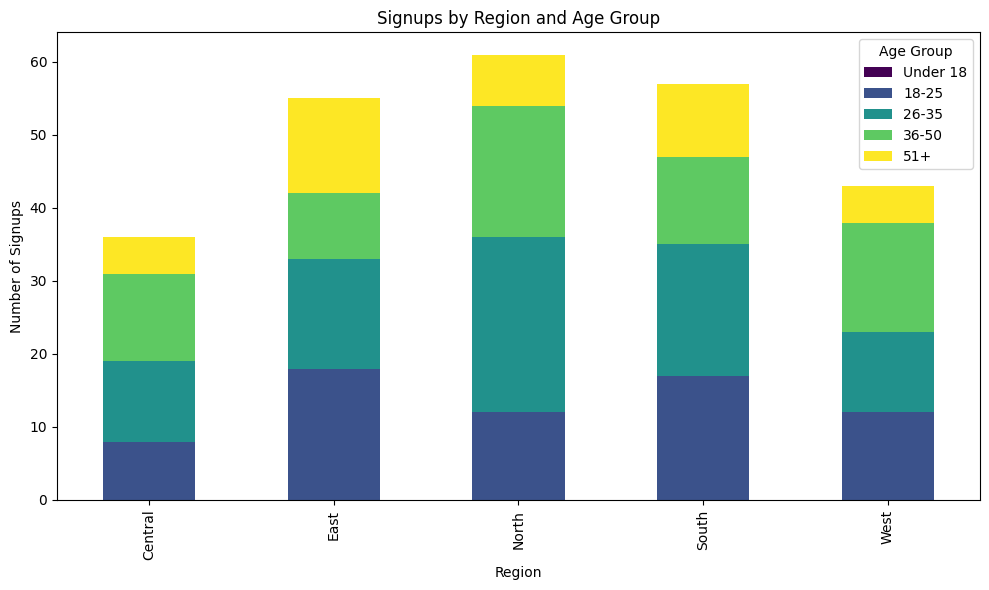

In [66]:
# Visualzing Group by region and age group
region_age = customer_df.groupby(['region', 'age_group']).size().unstack().fillna(0)

# Plot the bar chart
region_age.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title("Signups by Region and Age Group")
plt.xlabel("Region")
plt.ylabel("Number of Signups")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


C:\Users\ESTHER TIANA\AppData\Local\Temp\ipykernel_13120\1214488778.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender = customer_df.groupby(['age_group', 'gender']).size().unstack().fillna(0)


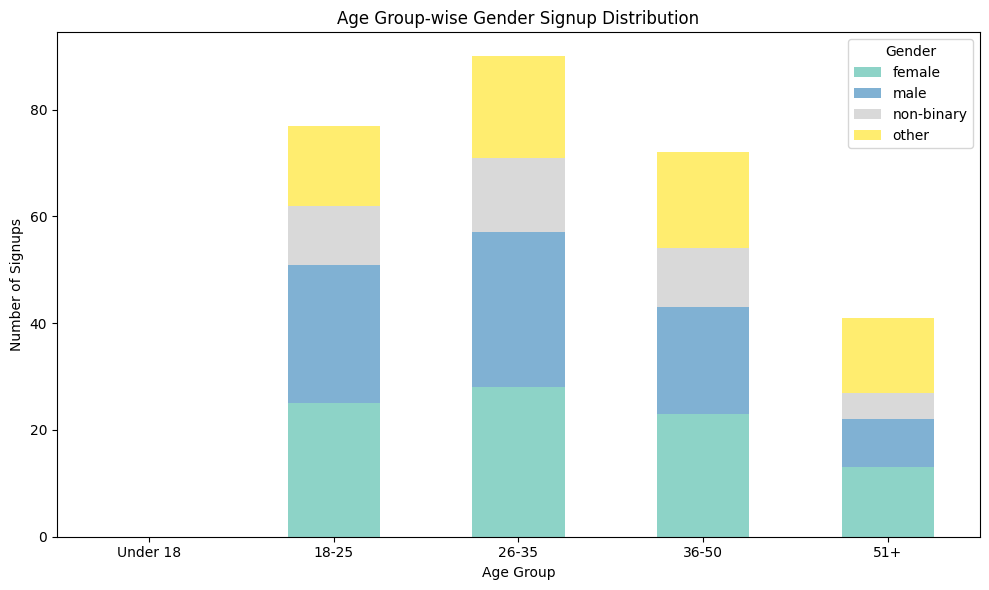

In [67]:
# Visualizing Group by age group and gender
age_gender = customer_df.groupby(['age_group', 'gender']).size().unstack().fillna(0)

# Plot the bar chart
age_gender.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')
plt.title('Age Group-wise Gender Signup Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Signups')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [69]:
# Cleaning 'plan_selected' column
df['plan_selected'] = df['plan_selected'].str.strip().str.lower()

# Map values to clean categories
plan_mapping = {
    'basic': 'Basic',
    'pro': 'Pro',
    'premium': 'Premium',
    'unknown plan': 'Unknown',
    '': 'Unknown',
    None: 'Unknown'
}
df['plan_selected'] = df['plan_selected'].map(plan_mapping).fillna('Unknown')

# Cleaning 'marketing_opt_in' column
df['marketing_opt_in'] = df['marketing_opt_in'].str.strip().str.lower()
df['marketing_opt_in'] = df['marketing_opt_in'].map({'yes': 'Yes', 'no': 'No'}).fillna('No')


C:\Users\ESTHER TIANA\AppData\Local\Temp\ipykernel_13120\2792921370.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='plan_selected', order=['Basic', 'Pro', 'Premium', 'Unknown'], palette='pastel')


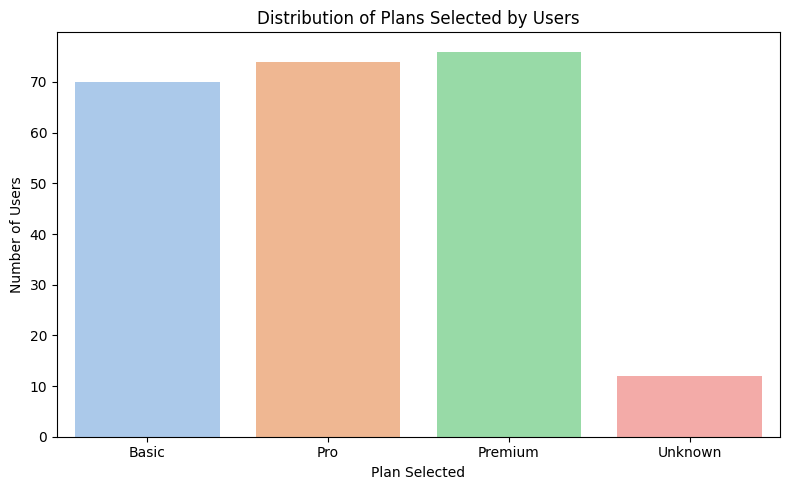

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for plan_selected
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='plan_selected', order=['Basic', 'Pro', 'Premium', 'Unknown'], palette='pastel')
plt.title('Distribution of Plans Selected by Users')
plt.xlabel('Plan Selected')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()


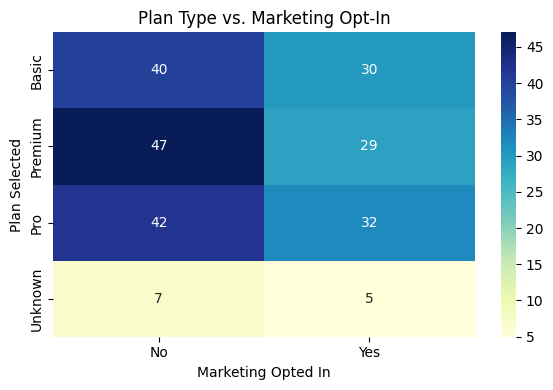

In [71]:
# Heatmap or crosstab of plan vs marketing opt-in
ct = pd.crosstab(df['plan_selected'], df['marketing_opt_in'])

plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Plan Type vs. Marketing Opt-In')
plt.ylabel('Plan Selected')
plt.xlabel('Marketing Opted In')
plt.tight_layout()
plt.show()
